### Melvina Quartey RIN# 662067086

### ML Final Project


I obtained a dataset for airfoils in flow Reynolds Number 50,000 from airfoiltools.com.
Features are 'Max Thickness (%)', 'Thickness Position (%)', 'Max Camber (%)', 'Camber Position (%)'
Target is 'Max Cl/Cd (Re=50000)
I use Linear Regression, Deep Neural Network, Random Forest Regressor and SVM Regressor models to predict the target from the features and compare their performance using MSE and R-2 scores as metrics.
I also determine the relative importances of the 4 features.




This first section loads the data, creates a dataframe, prints it out and compares

                       Airfoil Name  Max Thickness (%)  \
0                 GOE 79 (PFALZ 11)                6.2   
1                       E63 (4.25%)                4.3   
2                       E63 (4.25%)                4.3   
3                       E71 (5.15%)                5.2   
4                         AH-7-47-6                5.9   
...                             ...                ...   
1681         MH 94 16.03% (mh94-il)               16.0   
1682   EPPLER 327 AIRFOIL (e327-il)               13.1   
1683       HQ 0/9 AIRFOIL (hq09-il)                8.1   
1684  EPPLER E851 AIRFOIL (e851-il)                9.0   
1685    GOE 12K AIRFOIL (goe12k-il)               11.1   

      Thickness Position (%)  Max Camber (%)  Camber Position (%)  \
0                       14.9             6.0                 29.9   
1                       22.8             5.3                 50.5   
2                       22.8             5.3                 50.5   
3                       25.

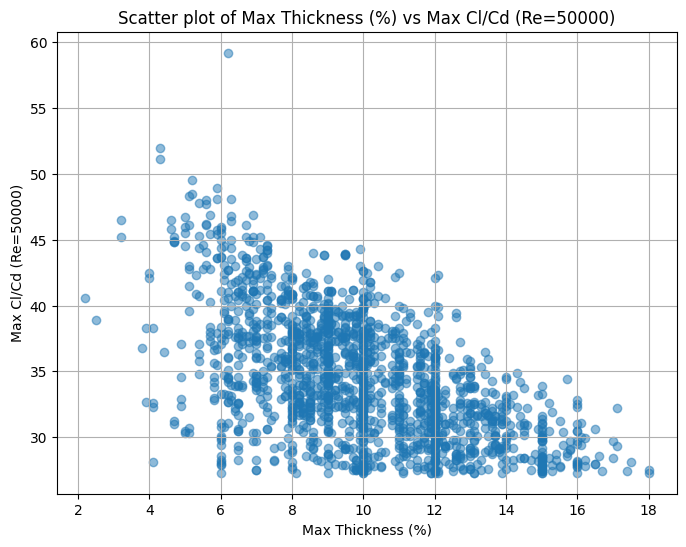

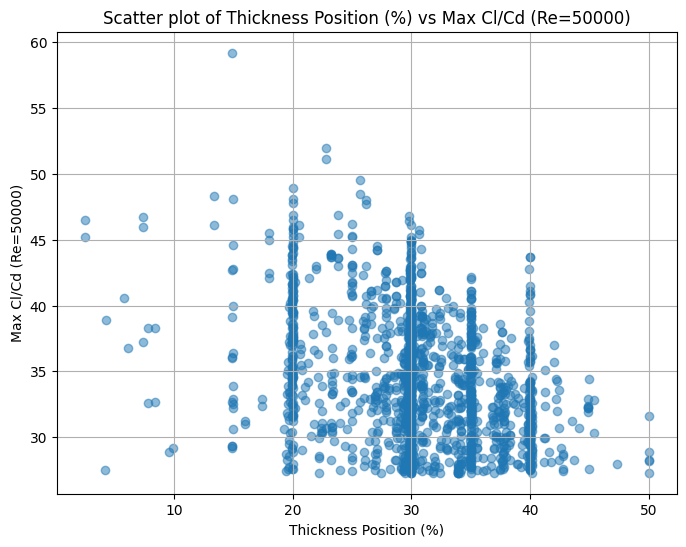

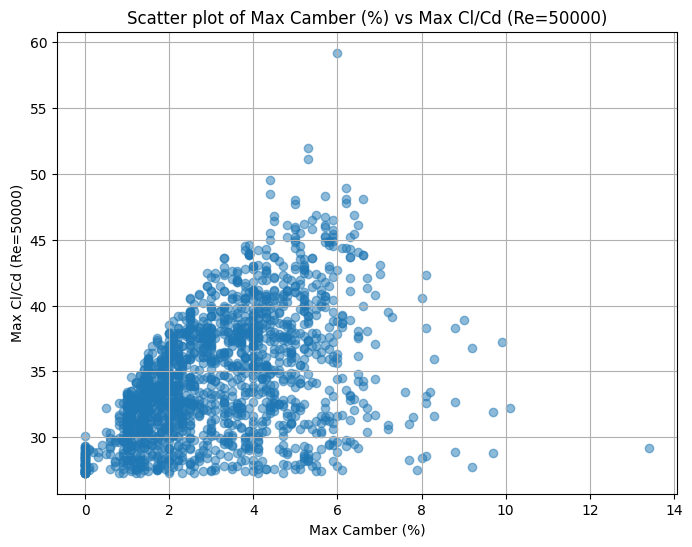

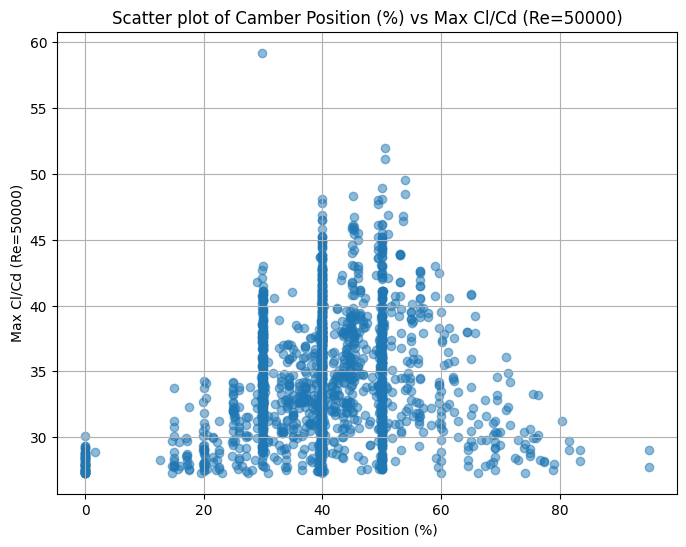

In [8]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data from the Google Doc CSV
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vR-8c9mSoyIo2s0GhXUg8GftAenUnmcdoJ8lWRx-MYnEcwF78nQ4hAIHhn3cmoEGJbyYxrAw8IKubrg/pub?output=csv"
data = pd.read_csv(url)
print(data)

X = data[['Max Thickness (%)', 'Thickness Position (%)', 'Max Camber (%)', 'Camber Position (%)']]
y = data['Max Cl/Cd (Re=50000)']
# Combine features and target into one DataFrame
df = X.copy()
df['Max Cl/Cd (Re=50000)'] = y
# Iterate through each feature in printing scatterplots
for feature in X.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(X[feature], y, alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Max Cl/Cd (Re=50000)')
    plt.title(f'Scatter plot of {feature} vs Max Cl/Cd (Re=50000)')
    plt.grid(True)
    plt.show()



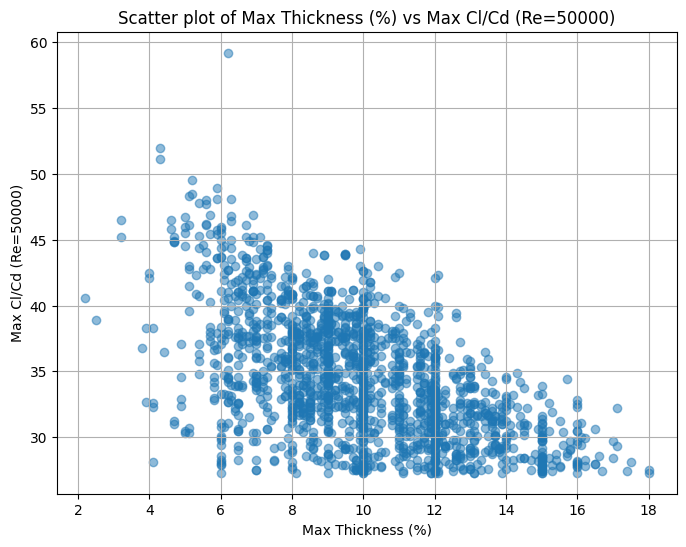

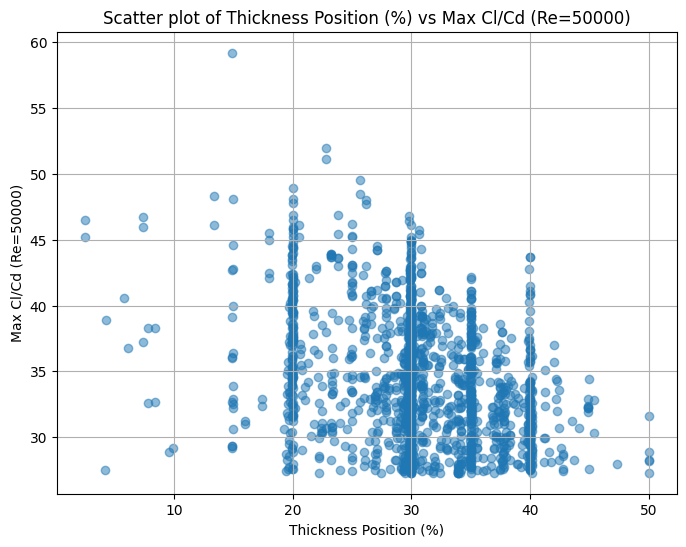

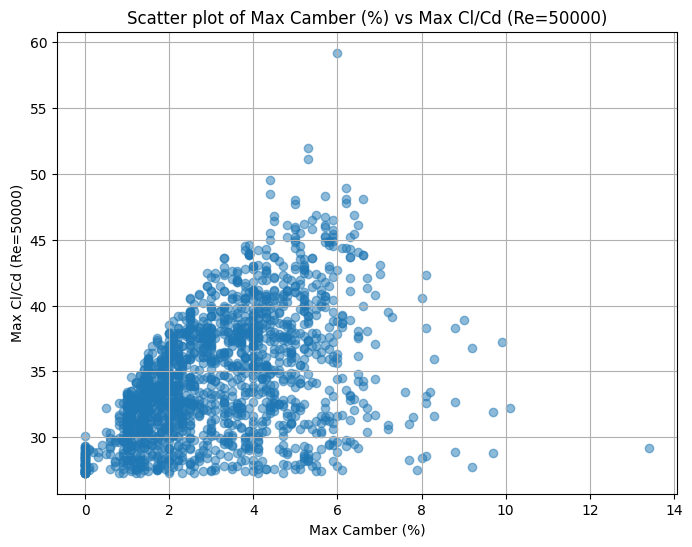

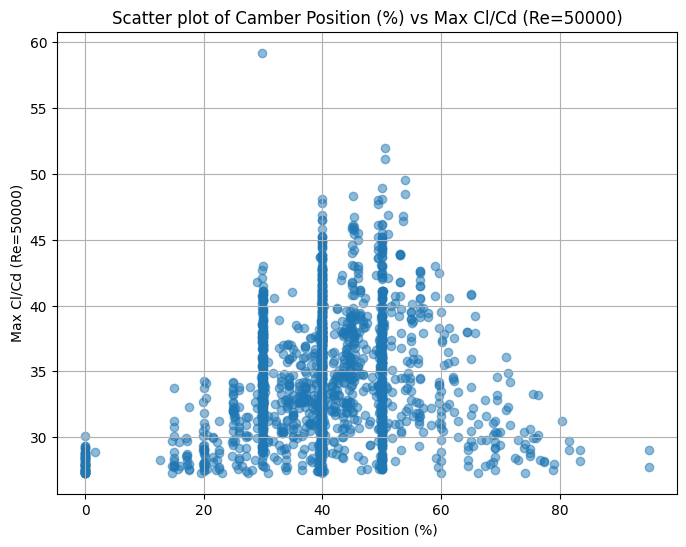

Below, I fit the data onto a linear regression model, evaluate it and calculate the relative feature importances.

Mean Squared Error: 10.713880916261017
R-squared (R2) Score: 0.4713532736680962


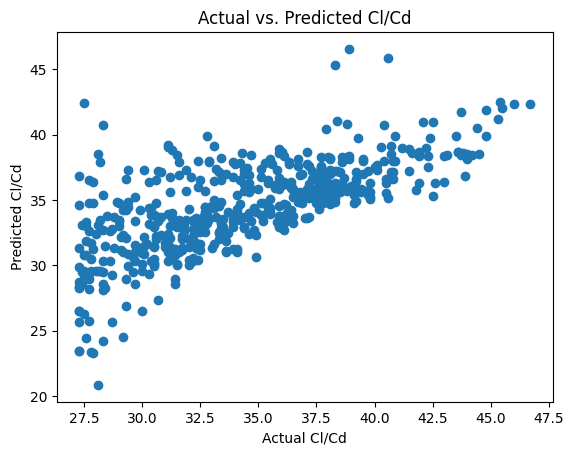

                  Feature  Normalized Coefficient  \
0       Max Thickness (%)               -0.485372   
2          Max Camber (%)                0.284555   
3     Camber Position (%)                0.212748   
1  Thickness Position (%)               -0.017326   

   Absolute Normalized Coefficient  
0                         0.485372  
2                         0.284555  
3                         0.212748  
1                         0.017326  


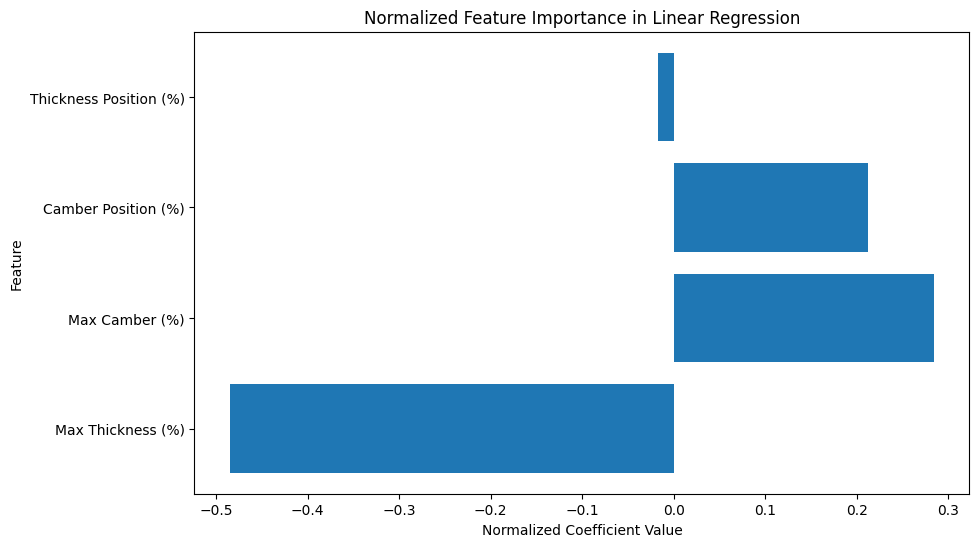

In [11]:
# Linear regression

from sklearn.preprocessing import StandardScaler


#Split data into features and target variable
X = data[['Max Thickness (%)', 'Thickness Position (%)', 'Max Camber (%)', 'Camber Position (%)']]
y = data['Max Cl/Cd (Re=50000)']

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Linear regression
#Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

#Evaluate the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

# Visualize actual vs. predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Cl/Cd")
plt.ylabel("Predicted Cl/Cd")
plt.title("Actual vs. Predicted Cl/Cd")
plt.show()

# Get the coefficients of the linear regression model
coefficients = model.coef_

# Calculate the absolute sum of coefficients
abs_sum_coefficients = np.abs(coefficients).sum()

# Normalize the coefficients
normalized_coefficients = coefficients / abs_sum_coefficients

# Create a DataFrame to display the normalized coefficients along with their corresponding feature names
normalized_coefficients_df = pd.DataFrame({'Feature': X.columns, 'Normalized Coefficient': normalized_coefficients})

# Sort the DataFrame by the absolute value of normalized coefficients to see the most influential features
normalized_coefficients_df['Absolute Normalized Coefficient'] = np.abs(normalized_coefficients_df['Normalized Coefficient'])
normalized_coefficients_df = normalized_coefficients_df.sort_values(by='Absolute Normalized Coefficient', ascending=False)

# Display the normalized coefficients
print(normalized_coefficients_df)

# Visualize the normalized coefficients
plt.figure(figsize=(10, 6))
plt.barh(normalized_coefficients_df['Feature'], normalized_coefficients_df['Normalized Coefficient'])
plt.xlabel('Normalized Coefficient Value')
plt.ylabel('Feature')
plt.title('Normalized Feature Importance in Linear Regression')
plt.show()


The linear regression does not score too well in R-2, indicating that the linear model does not really explain or understand how the features explain the variance in target values accross datapoints.

Now, I try a Random Forest Regressor.

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 50}
Mean Squared Error (MSE): 6.198482973052318
R-squared (R2) Score: 0.6941530564377684


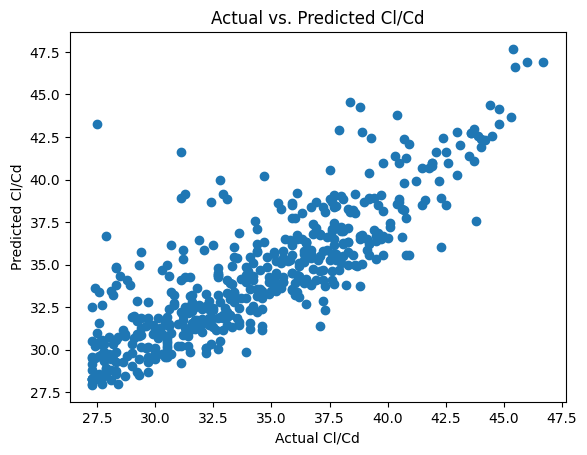

                  Feature  Importance
0       Max Thickness (%)    0.437595
2          Max Camber (%)    0.328495
3     Camber Position (%)    0.181467
1  Thickness Position (%)    0.052444


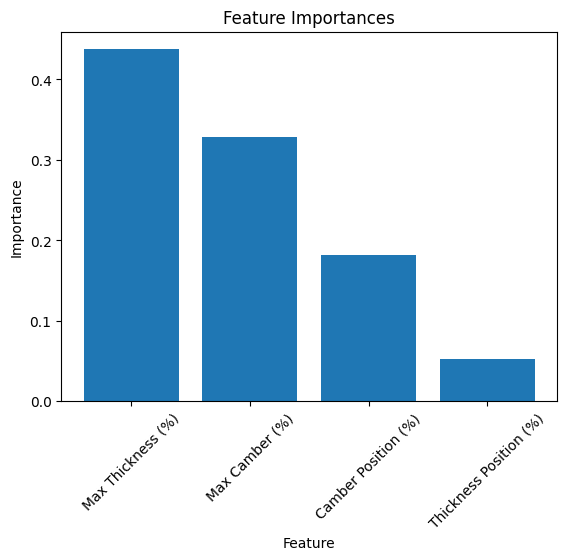

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [25, 50, 100],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [15, 20, 25],
    'min_samples_leaf': [1, 2, 3]
}

# Create a random forest regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best estimator for predictions
best_rf_regressor = grid_search.best_estimator_
y_pred = best_rf_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

# Visualize actual vs. predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Cl/Cd")
plt.ylabel("Predicted Cl/Cd")
plt.title("Actual vs. Predicted Cl/Cd")
plt.show()

# Get feature importances
feature_importances = best_rf_regressor.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize feature importances
print(importance_df)

# Plot feature importances
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()

Random Forest Regressor definitely performs better than the linear regression model. However, it maximizes at an R-2 score of 0.69 even after a grid-search. My best intuition is to try other models to see if any improvements exist.
So next is the Deep Neural Network.


In terms of feature importances, it gives similar results to the Linear Regression model.





16/16 [==============================] - 0s 2ms/step
Mean Squared Error: 6.313516595875958
R-squared (R2) Score: 0.6884770414998462


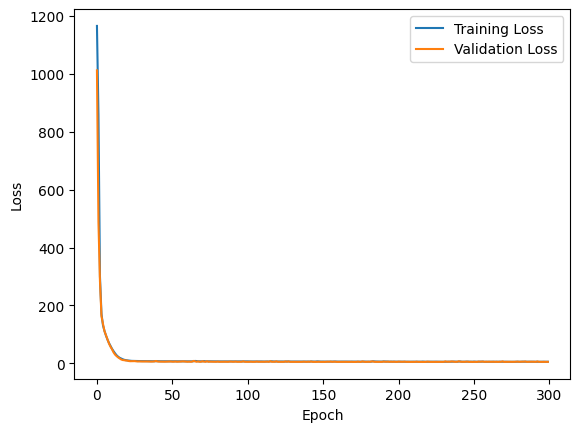

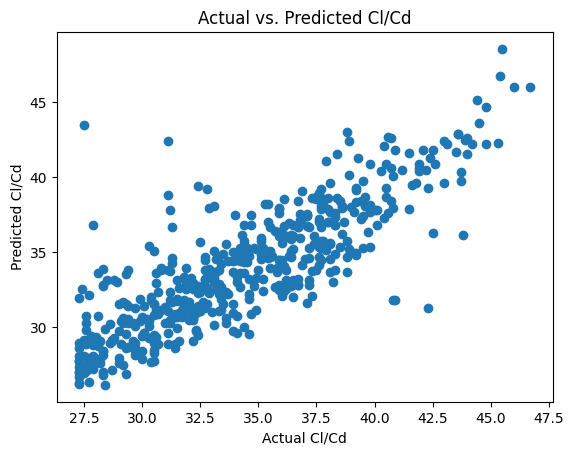

In [2]:
# Deep Neural Network

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Loading the data
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vR-8c9mSoyIo2s0GhXUg8GftAenUnmcdoJ8lWRx-MYnEcwF78nQ4hAIHhn3cmoEGJbyYxrAw8IKubrg/pub?output=csv"
data = pd.read_csv(url)

# Define features and target
X = data[['Max Thickness (%)', 'Thickness Position (%)', 'Max Camber (%)', 'Camber Position (%)']]
y = data['Max Cl/Cd (Re=50000)']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Deep Neural Network
# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=300, batch_size=64,
                    validation_split=0.2, verbose=0)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Optional: Visualize actual vs. predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Cl/Cd")
plt.ylabel("Predicted Cl/Cd")
plt.title("Actual vs. Predicted Cl/Cd")
plt.show()


This performs similar to the Random Forest Regressor. I go on to iterate different settings for better results. Below, I try DNN with Dropout of 0.1

16/16 [==============================] - 0s 2ms/step
Mean Squared Error: 6.031038147223606
R-squared (R2) Score: 0.7024151567641976


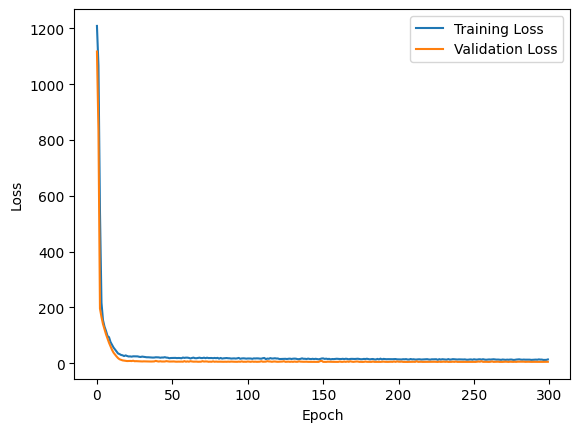

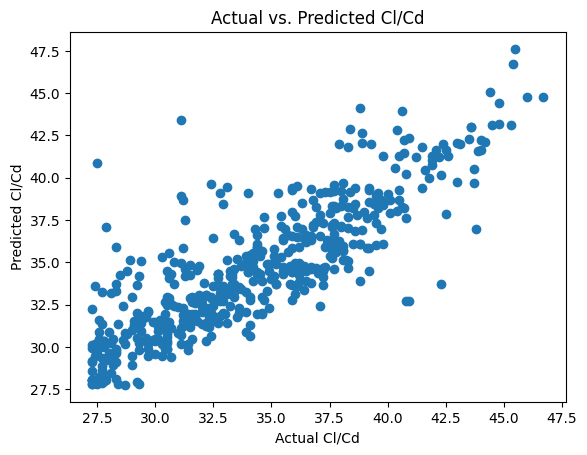

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Loading the data
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vR-8c9mSoyIo2s0GhXUg8GftAenUnmcdoJ8lWRx-MYnEcwF78nQ4hAIHhn3cmoEGJbyYxrAw8IKubrg/pub?output=csv"
data = pd.read_csv(url)

# Define features and target
X = data[['Max Thickness (%)', 'Thickness Position (%)', 'Max Camber (%)', 'Camber Position (%)']]
y = data['Max Cl/Cd (Re=50000)']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=300, batch_size=64, validation_split=0.2, verbose=0)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Optional: Visualize actual vs. predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Cl/Cd")
plt.ylabel("Predicted Cl/Cd")
plt.title("Actual vs. Predicted Cl/Cd")
plt.show()


It appears to perform slightly better, but truly not consistently.

16/16 [==============================] - 0s 2ms/step
Mean Squared Error: 6.274217419888346
R-squared (R2) Score: 0.6904161502967212


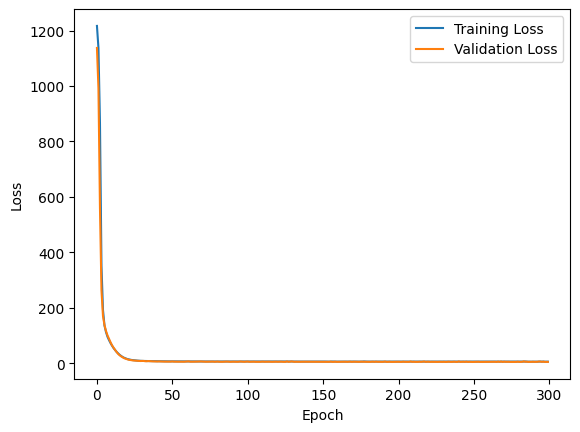

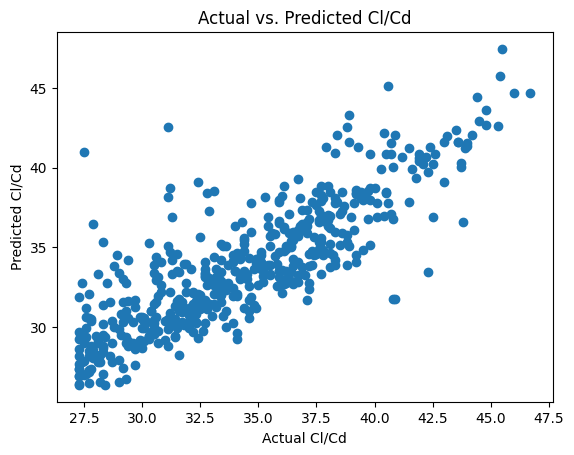

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Loading the data
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vR-8c9mSoyIo2s0GhXUg8GftAenUnmcdoJ8lWRx-MYnEcwF78nQ4hAIHhn3cmoEGJbyYxrAw8IKubrg/pub?output=csv"
data = pd.read_csv(url)

# Define features and target
X = data[['Max Thickness (%)', 'Thickness Position (%)', 'Max Camber (%)', 'Camber Position (%)']]
y = data['Max Cl/Cd (Re=50000)']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=300, batch_size=64, validation_split=0.2, verbose=0)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Optional: Visualize actual vs. predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Cl/Cd")
plt.ylabel("Predicted Cl/Cd")
plt.title("Actual vs. Predicted Cl/Cd")
plt.show()


In [14]:
import numpy as np

# Get the weights of the connections between the input layer and the first hidden layer
weights_input_hidden = model.layers[0].get_weights()[0]

# Calculate feature importances based on weights
feature_importances = np.abs(weights_input_hidden).sum(axis=1)

# Normalize the feature importances (optional)
feature_importances /= feature_importances.sum()

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Print feature importances
for i, idx in enumerate(sorted_indices):
    print(f"Feature {idx + 1}: Importance = {feature_importances[idx]}")


Feature 3: Importance = 0.27239155769348145
Feature 1: Importance = 0.26155030727386475
Feature 4: Importance = 0.24796442687511444
Feature 2: Importance = 0.21809372305870056


The performance seems to be peaking at 0.7 R2 score no matter how many alterations I make.
Maybe the data itself limits the performance of the model in that there is no consistent trend.
Let's try some feature engineering too...

      Max Thickness (%)  Thickness Position (%)  Max Camber (%)  \
0                   6.2                    14.9             6.0   
1                   4.3                    22.8             5.3   
2                   4.3                    22.8             5.3   
3                   5.2                    25.7             4.4   
4                   5.9                    20.0             6.2   
...                 ...                     ...             ...   
1681               16.0                    34.1             1.3   
1682               13.1                    32.4             2.6   
1683                8.1                    33.9             0.0   
1684                9.0                    37.0             2.3   
1685               11.1                    50.0             4.1   

      Camber Position (%)  Max Cl/Cd (Re=50000)  Max_Ratio  Position_Ratio  
0                    29.9                  59.2   0.967742        2.006711  
1                    50.5                

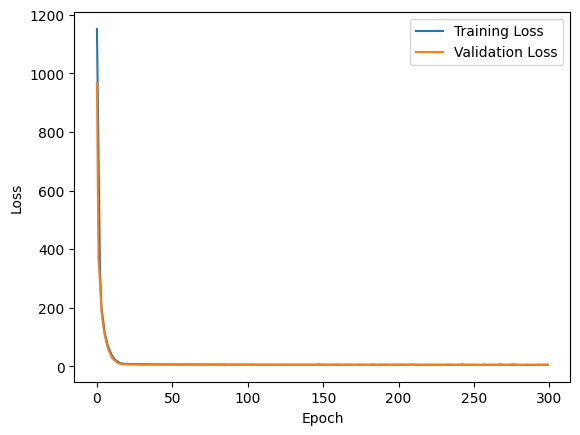

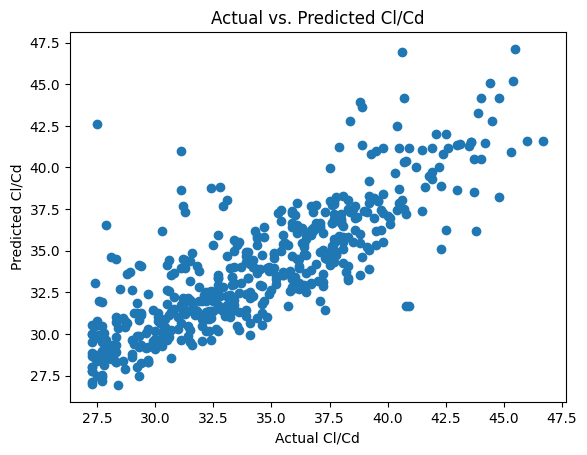

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

# Loading the data
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vR-8c9mSoyIo2s0GhXUg8GftAenUnmcdoJ8lWRx-MYnEcwF78nQ4hAIHhn3cmoEGJbyYxrAw8IKubrg/pub?output=csv"
data = pd.read_csv(url)


# Feature engineering
data['Max_Ratio'] = data['Max Camber (%)'] / data['Max Thickness (%)']
data['Position_Ratio'] = data['Camber Position (%)'] / data['Thickness Position (%)']
# Drop the 'Airfoil Name' column
data.drop('Airfoil Name', axis=1, inplace=True)

print(data)

# Find the number of NaN values in each column
nan_counts = data.isna().sum()

# Sum up the NaN values across all columns
total_nan_entries = nan_counts.sum()

print("Total NaN entries:", total_nan_entries)

# Delete rows containing NaN values
data.dropna(inplace=True)

# Reset the index after dropping rows
data.reset_index(drop=True, inplace=True)


# Define features and target
X = data[['Max Thickness (%)', 'Thickness Position (%)', 'Max Camber (%)', 'Camber Position (%)',
          'Max_Ratio', 'Position_Ratio']]
y = data['Max Cl/Cd (Re=50000)']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=300, batch_size=64, validation_split=0.2, verbose=0)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Optional: Visualize actual vs. predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Cl/Cd")
plt.ylabel("Predicted Cl/Cd")
plt.title("Actual vs. Predicted Cl/Cd")
plt.show()


I am trying out some cross-valiation on the baseline model to know if there was some form of bias in the splitting of training and validation data.

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.base import clone

# Loading the data
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vR-8c9mSoyIo2s0GhXUg8GftAenUnmcdoJ8lWRx-MYnEcwF78nQ4hAIHhn3cmoEGJbyYxrAw8IKubrg/pub?output=csv"
data = pd.read_csv(url)

# Define features and target
X = data[['Max Thickness (%)', 'Thickness Position (%)', 'Max Camber (%)', 'Camber Position (%)']]
y = data['Max Cl/Cd (Re=50000)']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the model
def create_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_scaled.shape[1],)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Perform k-fold cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
r2_scores = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = create_model()
    history = model.fit(X_train, y_train, epochs=300, batch_size=64, verbose=0)
    y_pred = model.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))

# Print the cross-validation scores
print("Cross-Validation R-squared (R2) Scores:", r2_scores)
print("Mean R-squared (R2) Score:", np.mean(r2_scores))


11/11 [==============================] - 0s 2ms/step
Cross-Validation R-squared (R2) Scores: [0.660520088345016, 0.6983669059172126, 0.7042762574454543, 0.6358338674783723, 0.751186544534343]
Mean R-squared (R2) Score: 0.6900367327440796


Even after cross-validation, I find that the model performs the same way. This means the split was as good as could be.
Now I add 6 more meaninful features as derivations that are intuitive to the geomentry to see if the model performs better.

Total NaN entries: 54
16/16 [==============================] - 0s 2ms/step
Mean Squared Error: 7.242307291164581
R-squared (R2) Score: 0.6225734290025364


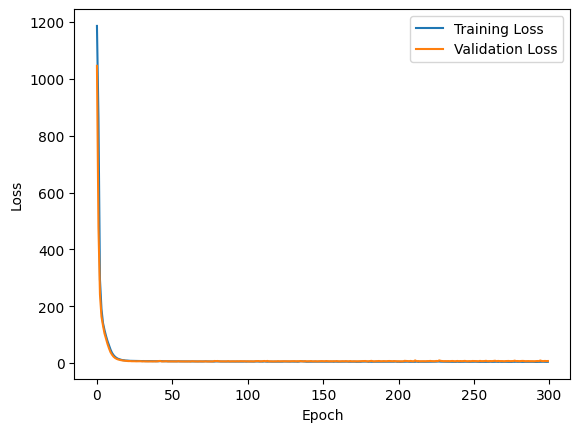

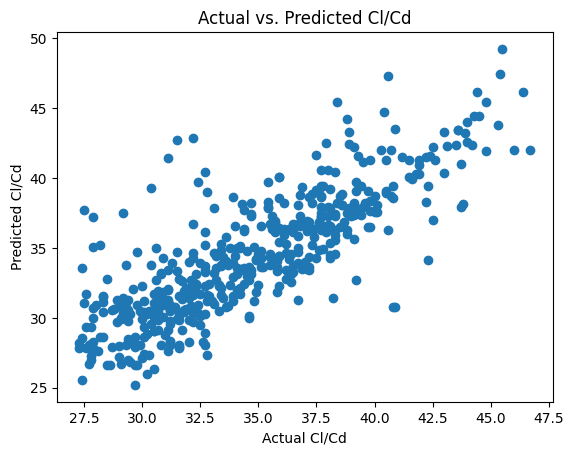

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Loading the data
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vR-8c9mSoyIo2s0GhXUg8GftAenUnmcdoJ8lWRx-MYnEcwF78nQ4hAIHhn3cmoEGJbyYxrAw8IKubrg/pub?output=csv"
data = pd.read_csv(url)

# Calculate new geometric features
data['Camber_Thickness_Difference'] = data['Max Camber (%)'] - data['Max Thickness (%)']
data['Camber_Thickness_Ratio'] = data['Max Camber (%)'] / data['Max Thickness (%)']
data['Camber_Position_Ratio'] = data['Max Camber (%)'] / data['Camber Position (%)']
data['Thickness_Position_Ratio'] = data['Max Thickness (%)'] / data['Thickness Position (%)']
data['Camber_Thickness_Position_Ratio'] = data['Camber Position (%)'] / data['Thickness Position (%)']
data['Camber_Thickness_Position_Difference'] = data['Camber Position (%)'] - data['Thickness Position (%)']

# Find the number of NaN values in each column
nan_counts = data.isna().sum()

# Sum up the NaN values across all columns
total_nan_entries = nan_counts.sum()

print("Total NaN entries:", total_nan_entries)

# Delete rows containing NaN values
data.dropna(inplace=True)

# Reset the index after dropping rows
data.reset_index(drop=True, inplace=True)
# Define features and target
X = data[['Max Thickness (%)', 'Thickness Position (%)', 'Max Camber (%)', 'Camber Position (%)',
          'Camber_Position_Ratio', 'Thickness_Position_Ratio', 'Camber_Thickness_Position_Ratio',
          'Camber_Thickness_Position_Difference','Camber_Thickness_Difference', 'Camber_Thickness_Ratio', ]]
y = data['Max Cl/Cd (Re=50000)']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=300, batch_size=64, validation_split=0.2, verbose=0)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Optional: Visualize actual vs. predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Cl/Cd")
plt.ylabel("Predicted Cl/Cd")
plt.title("Actual vs. Predicted Cl/Cd")
plt.show()


The new features do not exactly help. Let's instead remove outliers to see if the baseline model does better.

Number of outliers removed: 91
16/16 [==============================] - 0s 2ms/step
Mean Squared Error: 7.956835215418692
R-squared (R2) Score: 0.5928416279894548


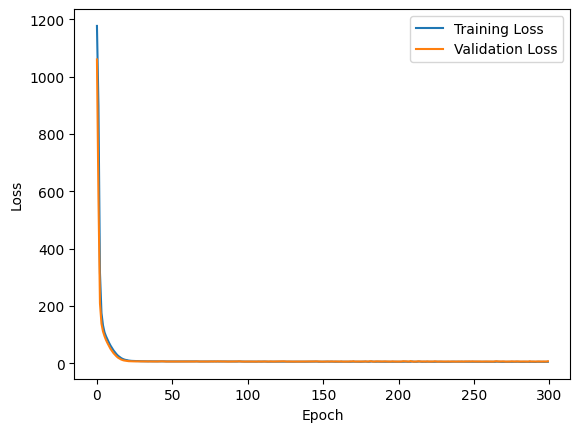

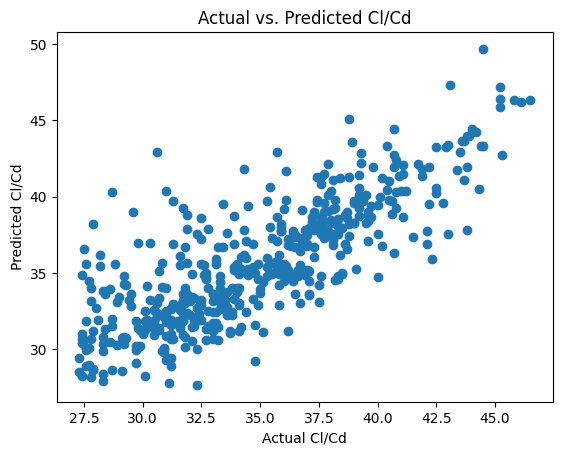

In [43]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Loading the data
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vR-8c9mSoyIo2s0GhXUg8GftAenUnmcdoJ8lWRx-MYnEcwF78nQ4hAIHhn3cmoEGJbyYxrAw8IKubrg/pub?output=csv"
data = pd.read_csv(url)

# Define features and target
X = data[['Max Thickness (%)', 'Thickness Position (%)', 'Max Camber (%)', 'Camber Position (%)']]
y = data['Max Cl/Cd (Re=50000)']

# Calculate z-scores for each feature
z_scores = np.abs(stats.zscore(X))

# Define threshold for outlier detection (e.g., z-score > 3)
threshold = 3

# Identify outliers
outliers = np.where(z_scores > threshold)

# Count the number of outliers
num_outliers = len(outliers[0])

# Calculate the size difference
num_points_removed = num_outliers

# Print the number of points removed
print("Number of outliers removed:", num_points_removed)

# Filter rows where any feature has a z-score greater than the threshold
X_no_outliers = X[(z_scores < threshold).all(axis=1)]
y_no_outliers = y[(z_scores < threshold).all(axis=1)]

# Split the filtered data into train and test sets
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    X_no_outliers, y_no_outliers, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_no_outliers)
X_test_scaled = scaler.transform(X_test_no_outliers)

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train_no_outliers, epochs=300, batch_size=64, validation_split=0.2, verbose=0)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test_no_outliers, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test_no_outliers, y_pred)
print("R-squared (R2) Score:", r2)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Optional: Visualize actual vs. predicted
plt.scatter(y_test_no_outliers, y_pred)
plt.xlabel("Actual Cl/Cd")
plt.ylabel("Predicted Cl/Cd")
plt.title("Actual vs. Predicted Cl/Cd")
plt.show()


Oddly enough, removing outliers does not increase the performance of the model!

Make another attempt using SVM regressor to confirm that 0.7 really is the peak R-2 score I can obtain on my data

Mean Squared Error (SVM): 6.398109833941148
R-squared (R2) Score (SVM): 0.6843030228858159


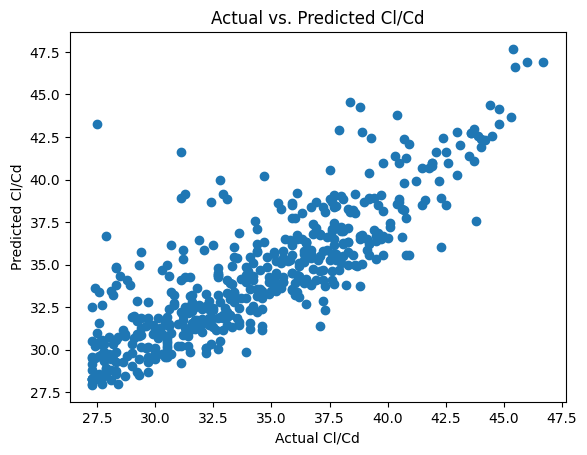

In [14]:
from sklearn.svm import SVR

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.base import clone

# Loading the data
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vR-8c9mSoyIo2s0GhXUg8GftAenUnmcdoJ8lWRx-MYnEcwF78nQ4hAIHhn3cmoEGJbyYxrAw8IKubrg/pub?output=csv"
data = pd.read_csv(url)

# Define features and target
X = data[['Max Thickness (%)', 'Thickness Position (%)', 'Max Camber (%)', 'Camber Position (%)']]
y = data['Max Cl/Cd (Re=50000)']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


# Define the SVM regressor
svm_regressor = SVR(kernel='rbf')

# Train the SVM regressor
svm_regressor.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_regressor.predict(X_test)

# Evaluate the SVM regressor
mse_svm = mean_squared_error(y_test, y_pred_svm)
print("Mean Squared Error (SVM):", mse_svm)

r2_svm = r2_score(y_test, y_pred_svm)
print("R-squared (R2) Score (SVM):", r2_svm)

# Optional: Visualize actual vs. predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Cl/Cd")
plt.ylabel("Predicted Cl/Cd")
plt.title("Actual vs. Predicted Cl/Cd")
plt.show()


And thus, the tests come to an end for now.

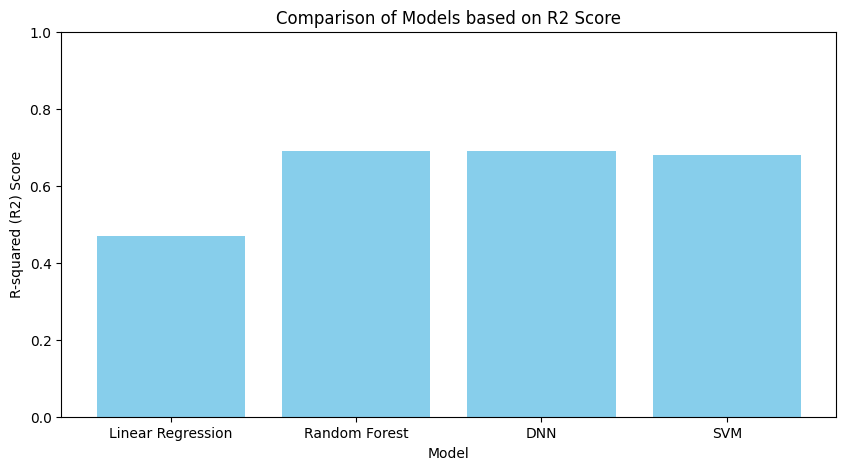

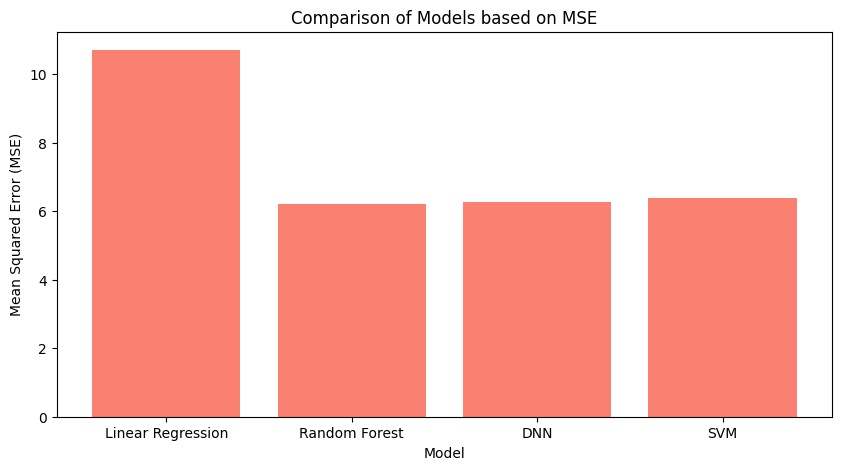

In [1]:
import matplotlib.pyplot as plt

# Model names
models = ['Linear Regression', 'Random Forest', 'DNN', 'SVM']

# Model performance metrics
mse_scores = [10.71, 6.20, 6.27, 6.40]
r2_scores = [0.47, 0.69, 0.69, 0.68]

# Plotting R-squared scores
plt.figure(figsize=(10, 5))
plt.bar(models, r2_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('R-squared (R2) Score')
plt.title('Comparison of Models based on R2 Score')
plt.ylim(0, 1)  # Limit y-axis to range between 0 and 1 for R2 score
plt.show()

# Plotting MSE scores
plt.figure(figsize=(10, 5))
plt.bar(models, mse_scores, color='salmon')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Models based on MSE')
plt.show()
